In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.rcParams.update(_VSCode_defaultMatplotlib_Params)
BASE_DIR = "/Users/adarsh_23/CNS/Envisioning-Kaggle-main/Filtered"
comp_title = "HuBMAP + HPA - Hacking the Human Body"

In [9]:
teams_df = pd.read_csv(BASE_DIR+'/Teams.csv', infer_datetime_format=True)
forums_df = pd.read_csv(BASE_DIR+'/Forums.csv', infer_datetime_format=True)
forums_topics_df = pd.read_csv(BASE_DIR+'/ForumTopics.csv', infer_datetime_format=True)
forums_messages_df = pd.read_csv(BASE_DIR+'/ForumMessages.csv', infer_datetime_format=True)
forums_message_votes_df = pd.read_csv(BASE_DIR+'/ForumMessageVotes.csv', infer_datetime_format=True)
users_df = pd.read_csv(BASE_DIR+'/Users.csv', infer_datetime_format=True)


In [10]:
print(len(forums_messages_df))
forums_messages_df.head()

2149


,Unnamed: 0,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,1573311,1829591,332652,1095143,06/22/2022 18:28:51,NaN,<p>New to machine learning and data science? N...,1.0,09/14/2022
1,1573312,1829592,332653,1095143,06/22/2022 18:29:19,NaN,<p>Use this thread to find a teammate if you'r...,1.0,09/14/2022
2,1573365,1829647,332664,10654180,06/22/2022 19:23:08,NaN,"<h3><a href=""https://www.kaggle.com/competitio...",1.0,07/02/2022
3,1573376,1829658,332653,3894504,06/22/2022 19:36:15,1829592.0,"<p>Hey there! I am Dino from the <a href=""http...",NaN,NaN
4,1573382,1829664,332666,1536542,06/22/2022 19:43:37,NaN,<p>Welcome to the HuBMAP + HPA - Hacking the H...,1.0,06/28/2022


In [11]:
#teams
print(teams_df.shape) # (1175,14)
teams_df.head()

(1175, 14)


,Unnamed: 0,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank
0,5436360,8800915,34547,NaN,sample_submission.csv,NaN,06/21/2022,27162604.0,27162604.0,True,NaN,NaN,NaN,NaN
1,5439339,8805826,34547,2132795.0,kaerururu,NaN,06/27/2022,27191942.0,27191942.0,False,NaN,NaN,882.0,928.0
2,5439354,8805846,34547,1107630.0,Naruhiko Nakanishi,NaN,09/20/2022,28168052.0,28168052.0,False,NaN,NaN,264.0,250.0
3,5439359,8805854,34547,6537187.0,Ravi Shah,NaN,09/05/2022,28022290.0,28022290.0,False,NaN,NaN,258.0,267.0
4,5439389,8805890,34547,10654180.0,The Devastator,NaN,08/02/2022,27594449.0,27594449.0,False,NaN,NaN,472.0,440.0


In [12]:
#users
print(users_df.shape) #(1506,6)
users_df.head()

(1506, 6)


,Unnamed: 0,Id,UserName,DisplayName,RegisterDate,PerformanceTier
0,356,767,jonathanchan,Jonathan Chan,05/08/2010,2
1,770,1211,maryamnazarieh,MaryamNazarieh,06/09/2010,1
2,7293,8189,jkevin,jkevin,04/05/2011,1
3,16887,18463,mathurinache,Mathurin Aché,10/11/2011,3
4,21146,23356,chasset,Pierre-Olivier Chasset,11/15/2011,1


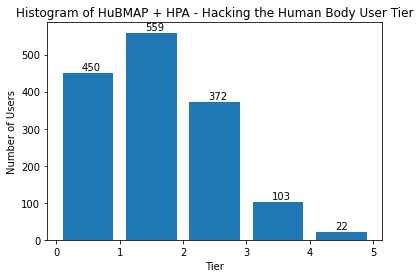

In [13]:
tier_bins=5
#plt.rcParams['axes.facecolor'] = 'white'  
#ax = plt.axes()
#ax.set_facecolor("white")
#plt.figure(facecolor='white')
hist_of_tier = plt.hist(users_df['PerformanceTier'], bins=[0,1,2,3,4,5], rwidth=0.8)
plt.title("Histogram of HuBMAP + HPA - Hacking the Human Body User Tier")
plt.xlabel("Tier")
plt.ylabel("Number of Users")
for i in range(tier_bins):
    plt.text(hist_of_tier[1][i] + 0.4,hist_of_tier[0][i]+ 8,str(int(hist_of_tier[0][i])))

bottom, top = plt.ylim()
plt.show()

In [14]:
counts, bins, bars = hist_of_tier
counts


array([450., 559., 372., 103.,  22.])

In [15]:
tiers = ['Novice', 'Contributor', 'Expert', 'Master', 'Grand Master']
tiers

['Novice', 'Contributor', 'Expert', 'Master', 'Grand Master']

In [16]:
tier_counts_df = pd.DataFrame(data={'Tier': tiers, 'NumOfUsers': counts})
tier_counts_df

,Tier,NumOfUsers
0,Novice,450.0
1,Contributor,559.0
2,Expert,372.0
3,Master,103.0
4,Grand Master,22.0


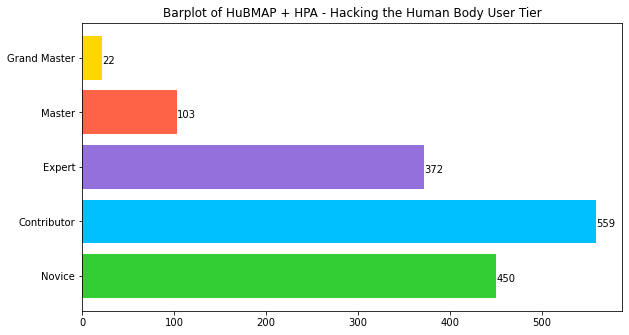

In [28]:
fig = plt.figure(figsize=(10,5))
axes= fig.add_axes((0.2, 0.1, 0.75, 0.8))
axes.barh(tier_counts_df.Tier, tier_counts_df.NumOfUsers, color=['limegreen', 'deepskyblue', 'mediumpurple', 'tomato', 'gold'])

for i, v in enumerate(tier_counts_df.NumOfUsers):
    plt.text(v + 0.1, i - .1, str(int(v)), fontsize='medium')
    
plt.title("Barplot of HuBMAP + HPA - Hacking the Human Body User Tier")
plt.savefig('hubmap user tier barplot.png')
plt.savefig('hubmap user tier barplot.svg')
plt.show()

In [29]:
reversed_tier_counts_df = tier_counts_df.iloc[::-1]
reversed_tier_counts_df

,Tier,NumOfUsers
4,Grand Master,22.0
3,Master,103.0
2,Expert,372.0
1,Contributor,559.0
0,Novice,450.0


In [36]:
reversed_tier_counts_df['NumOfUsers'] = [int(x) for x in reversed_tier_counts_df['NumOfUsers']]
reversed_tier_counts_df

,Tier,NumOfUsers
4,Grand Master,22
3,Master,103
2,Expert,372
1,Contributor,559
0,Novice,450


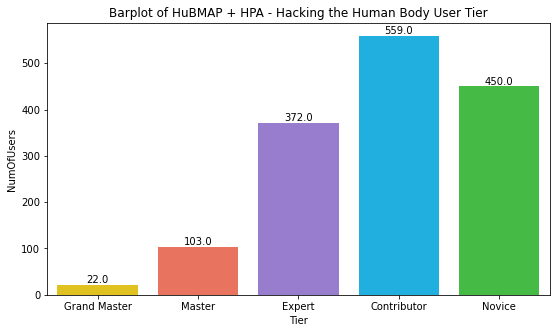

In [69]:
import seaborn as sns
custom_colors = ['gold', 'tomato','mediumpurple', 'deepskyblue', 'limegreen']
fig = plt.figure(figsize = (9,5))
plots = sns.barplot(x="Tier", y="NumOfUsers", data=reversed_tier_counts_df, palette=custom_colors)
#print([x for x in plots.patches])
for bar in plots.patches:
   
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    int(bar.get_height())), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
plt.title("Barplot of HuBMAP + HPA - Hacking the Human Body User Tier")
plt.savefig('hubmap user tier barplot.png')
plt.savefig('hubmap user tier barplot.svg')
plt.show()

In [70]:
#forums
forums_df.head()


,Unnamed: 0,Id,ParentForumId,Title
0,138614,1960467,8.0,HuBMAP + HPA - Hacking the Human Body


In [71]:
#forum topics
forums_topics_df.shape #(224, 14)
#forums_topics_df.head()

(224, 14)

In [48]:
forums_topics_df.head()

,Unnamed: 0,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
0,289024,348057,1960467,NaN,1918853.0,1915086.0,08/26/2022 16:47:40,08/29/2022 22:56:01,How to easily import `segmentation_models_pyto...,False,0,13,3,2
1,289025,348109,1960467,NaN,1915413.0,1915413.0,08/27/2022 00:37:05,08/27/2022 00:37:05,Open Sourcing Some Code on Measuring FTUs,False,0,3,1,0
2,289026,347984,1960467,NaN,1915572.0,1914578.0,08/26/2022 07:44:25,08/27/2022 05:08:57,How to find the optimal threshold for each organ?,False,0,1,3,2
3,289027,348188,1960467,NaN,1918846.0,1915833.0,08/27/2022 12:19:11,08/29/2022 22:51:39,Pytorch/TF averaging between folds and within ...,False,0,10,3,2
4,289028,347845,1960467,NaN,1914148.0,1913936.0,08/25/2022 15:31:25,08/25/2022 19:14:24,segmentation_models_pytorch DOES NOT WORK ON I...,False,0,-1,4,3


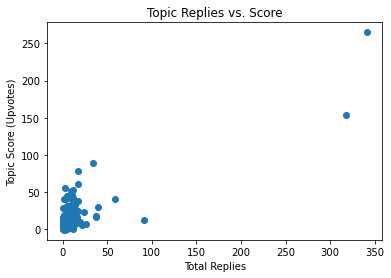

In [63]:
plt.scatter(forums_topics_df['TotalReplies'], forums_topics_df['Score'])
plt.xlabel('Total Replies')
plt.ylabel('Topic Score (Upvotes)')
plt.title('Topic Replies vs. Score')
plt.savefig('Replies vs Score.png')
plt.savefig('Replies vs Score.svg')
plt.show()

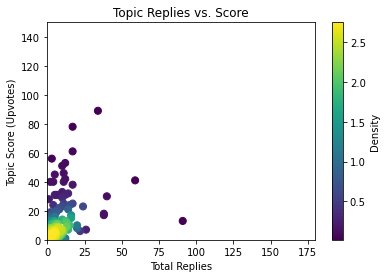

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize 

# identify data
x = forums_topics_df['TotalReplies']
y = forums_topics_df['Score']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.xlim([0, 180])
plt.xlabel('Total Replies')
plt.ylim([0, 150])
plt.ylabel('Topic Score (Upvotes)')
plt.title('Topic Replies vs. Score')
norm = Normalize(vmin = np.min(z)*2000, vmax = np.max(z)*2000)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Density')
plt.savefig('Replies vs Score Heat Scatter.png')
plt.savefig('Replies vs Score Heat Scatter.svg')
plt.show()


/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


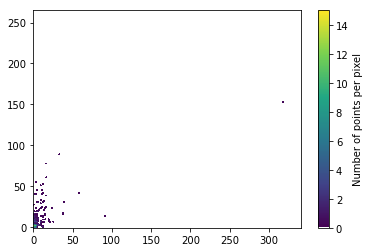

In [51]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=white_viridis)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
using_mpl_scatter_density(fig, x, y)
plt.show()

In [52]:
outlier_topics_replies = forums_topics_df[forums_topics_df['TotalReplies']>50]
outlier_topics_replies

,Unnamed: 0,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
43,289067,352023,1960467,NaN,1967517.0,1936391.0,09/12/2022 17:54:24,10/02/2022 14:57:37,I’m now Kaggle Grandmaster 🎉🎉 🙂,False,0,153,319,318
191,289215,333631,1960467,NaN,1930261.0,1835135.0,06/27/2022 13:57:42,09/07/2022 17:19:48,CV vs LB,False,0,41,60,59
204,289228,332653,1960467,NaN,1969235.0,1829592.0,06/22/2022 18:29:19,10/03/2022 11:37:40,Looking for a Team Megathread,False,0,13,92,91
223,289247,332941,1960467,NaN,1959908.0,1831209.0,06/24/2022 03:28:40,09/28/2022 11:35:55,"[ placeholder LB 0.81 single fold, coat-paral...",False,0,265,342,341


In [53]:
outlier_topics_score = forums_topics_df[forums_topics_df['Score']>120]
outlier_topics_score

,Unnamed: 0,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
43,289067,352023,1960467,NaN,1967517.0,1936391.0,09/12/2022 17:54:24,10/02/2022 14:57:37,I’m now Kaggle Grandmaster 🎉🎉 🙂,False,0,153,319,318
223,289247,332941,1960467,NaN,1959908.0,1831209.0,06/24/2022 03:28:40,09/28/2022 11:35:55,"[ placeholder LB 0.81 single fold, coat-paral...",False,0,265,342,341


In [54]:
topics_most_replies_df = forums_topics_df[forums_topics_df['TotalReplies']>35]
topics_most_replies_df.shape

(7, 14)

In [55]:
top_topics_list = topics_most_replies_df.Id.unique()

len(top_topics_list)

7

In [56]:
top_topics_list

array([348888, 352023, 343291, 336490, 333631, 332653, 332941])

In [57]:
# filter messages by top topics

top_topic_messages_df = forums_messages_df[forums_messages_df.ForumTopicId.isin(top_topics_list)]
top_topic_messages_df.shape

(912, 9)

In [58]:
top_topic_messages_df.to_csv(BASE_DIR+'/ForumMessagesForTopTopics.csv')

In [59]:
topics_most_replies_df

,Unnamed: 0,Id,ForumId,KernelId,LastForumMessageId,FirstForumMessageId,CreationDate,LastCommentDate,Title,IsSticky,TotalViews,Score,TotalMessages,TotalReplies
9,289033,348888,1960467,NaN,1940347.0,1919500.0,08/30/2022 13:04:50,09/15/2022 09:58:30,What's your HuBMAP only score?,False,0,17,39,38
43,289067,352023,1960467,NaN,1967517.0,1936391.0,09/12/2022 17:54:24,10/02/2022 14:57:37,I’m now Kaggle Grandmaster 🎉🎉 🙂,False,0,153,319,318
101,289125,343291,1960467,NaN,1944842.0,1893308.0,08/10/2022 17:47:28,09/18/2022 16:09:14,"Too much cv vs lb gap..(CV 78 vs LB 60), also ...",False,0,18,39,38
160,289184,336490,1960467,NaN,1929542.0,1851663.0,07/11/2022 12:32:42,09/07/2022 06:41:09,Congratulations to The Devastator for Becoming...,False,0,30,41,40
191,289215,333631,1960467,NaN,1930261.0,1835135.0,06/27/2022 13:57:42,09/07/2022 17:19:48,CV vs LB,False,0,41,60,59
204,289228,332653,1960467,NaN,1969235.0,1829592.0,06/22/2022 18:29:19,10/03/2022 11:37:40,Looking for a Team Megathread,False,0,13,92,91
223,289247,332941,1960467,NaN,1959908.0,1831209.0,06/24/2022 03:28:40,09/28/2022 11:35:55,"[ placeholder LB 0.81 single fold, coat-paral...",False,0,265,342,341


In [60]:
#forum messages
print(forums_messages_df.shape) #(3053,9)
forums_messages_df.head()


(2149, 9)


,Unnamed: 0,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate
0,1573311,1829591,332652,1095143,06/22/2022 18:28:51,NaN,<p>New to machine learning and data science? N...,1.0,09/14/2022
1,1573312,1829592,332653,1095143,06/22/2022 18:29:19,NaN,<p>Use this thread to find a teammate if you'r...,1.0,09/14/2022
2,1573365,1829647,332664,10654180,06/22/2022 19:23:08,NaN,"<h3><a href=""https://www.kaggle.com/competitio...",1.0,07/02/2022
3,1573376,1829658,332653,3894504,06/22/2022 19:36:15,1829592.0,"<p>Hey there! I am Dino from the <a href=""http...",NaN,NaN
4,1573382,1829664,332666,1536542,06/22/2022 19:43:37,NaN,<p>Welcome to the HuBMAP + HPA - Hacking the H...,1.0,06/28/2022


In [61]:
#forum message votes
print(forums_message_votes_df.shape) #(6883,6)
forums_message_votes_df.head()


(4257, 6)


,Unnamed: 0,Id,ForumMessageId,FromUserId,ToUserId,VoteDate
0,2094931,2834499,1829591,3012786,1095143,06/22/2022
1,2094932,2834523,1829591,8404799,1095143,06/22/2022
2,2094933,2846267,1829591,10941367,1095143,06/29/2022
3,2094934,2850954,1829591,10731811,1095143,07/02/2022
4,2094935,2913336,1829591,11071926,1095143,08/02/2022
